The Terry Stops project aims to address the need for improved efficiency and fairness in law enforcement actions, specifically during Terry stops, also known as "stop and frisk." A Terry stop refers to the temporary detention of an individual by a law enforcement officer based on reasonable suspicion of criminal activity. During this stop, an officer may also conduct a limited pat-down search if there is a reasonable suspicion that the person is armed and poses a threat.<br>
To enhance the decision-making process during Terry stops, the project proposes the development of a predictive model. This model would assist officers in assessing the likelihood of an arrest being made during a Terry stop, helping them make informed and objective decisions. By leveraging data and analytics, law enforcement agencies can potentially reduce false arrests and instances of police misconduct, leading to more efficient and fair law enforcement practices.<br>

### Features<br>

This dataset contains the following data:<br>

-  Subject Age Group: Subject Age Group (10 year increments) as reported by the officer.<br>
-  Subject ID: Key, generated daily, identifying unique subjects in the dataset using a character to character match of first name and last name. "Null" values indicate an "anonymous" or "unidentified" subject. Subjects of a Terry Stop are not required to present identification.<br>
-  GO / SC Num: General Offense or Street Check number, relating the Terry Stop to the parent report. This field may have a one to many relationship in the data.<br>
-  Terry Stop ID: Key identifying unique Terry Stop reports.<br>
-  Stop Resolution: Resolution of the stop as reported by the officer.<br>
-  Weapon Type: Type of weapon, if any, identified during a search or frisk of the subject. Indicates "None" if no weapons was found.<br>
-  Officer ID: Key identifying unique officers in the dataset.<br>
-  Officer YOB: Year of birth, as reported by the officer.<br>
-  Officer Gender: Gender of the officer, as reported by the officer.<br>
-  Officer Race: Race of the officer, as reported by the officer.<br>
-  Subject Perceived Race: Perceived race of the subject, as reported by the officer.<br>
-  Subject Perceived Gender: Perceived gender of the subject, as reported by the officer.<br>
-  Reported Date: Date the report was filed in the Records Management System (RMS). Not necessarily the date the stop occurred but generally within 1 day.<br>
-  Reported Time: Time the stop was reported in the Records Management System (RMS). Not the time the stop occurred but generally within 10 hours.<br>
-  Initial Call Type: Initial classification of the call as assigned by 911.<br>
-  Final Call Type: Final classification of the call as assigned by the primary officer closing the event.<br>
-  Call Type: How the call was received by the communication center.<br>
-  Officer Squad: Functional squad assignment (not budget) of the officer as reported by the Data Analytics Platform (DAP).<br>
-  Arrest Flag: Indicator of whether a "physical arrest" was made, of the subject, during the Terry Stop. Does not necessarily reflect a report of an arrest in the Records Management System (RMS).<br>
-  Frisk Flag: Indicator of whether a "frisk" was conducted, by the officer, of the subject, during the Terry Stop.<br>
-  Precinct: Precinct of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.<br>
-  Sector: Sector of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.<br>
-  Beat: Beat of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.

### Main Objective<br>

The objective of this project is to develop a classifier that can predict the outcome of a Terry Stop, specifically whether an arrest was made or not, based on the reasonable suspicion of criminal activity. By considering various factors and information available during the Terry Stop, such as the presence of weapons, time of day of the call, and other relevant details, the classifier aims to provide valuable insights to law enforcement officers.<br>

### Specific Objectives<br>
-  Address data quality issues (missing values, inconsistent formats, outliers).<br>
-  Develop a cleaning strategy (imputation, outlier detection, normalization).<br>
-  Implement necessary transformation steps (feature engineering, aggregation).<br>
-  Validate the cleaned and transformed dataset for integrity and usability.

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [2]:
# reading the csv file
df = pd.read_csv('terry-stops.csv')
df.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,36 - 45,NaN,20150000088359,10012,-,None,1735,1977.0,M,White,...,09:58:00.0000000,WARRANT - FELONY PICKUP,--WARRANT SERVICES - FELONY,ONVIEW,NaN,N,N,East,E,E2
1,26 - 35,NaN,20150000087858,10068,GO Report,None,1561,1984.0,M,White,...,19:08:00.0000000,THREATS (INCLS IN-PERSON/BY PHONE/IN WRITING),--DISTURBANCE - OTHER,911,NaN,N,N,East,G,G3
2,18 - 25,NaN,20150000001461,10103,Street Check,None,1539,1973.0,M,White,...,01:32:00.0000000,NaN,NaN,NaN,NaN,N,N,NaN,NaN,NaN
3,18 - 25,NaN,20150000001461,10104,Street Check,None,1539,1973.0,M,White,...,01:35:00.0000000,NaN,NaN,NaN,NaN,N,N,NaN,NaN,NaN
4,26 - 35,NaN,20150000103696,10207,Street Check,None,1539,1973.0,M,White,...,21:08:00.0000000,PROPERTY - DAMAGE,--PROPERTY DEST (DAMG),911,NaN,N,N,East,E,E2


In [3]:
#checking for duplicates within the dataset
print(f'The number of duplicates within the dataset is : {df.duplicated().sum()}')

The number of duplicates within the dataset is : 0


In [4]:
#checking for missing values
df.isna().sum()/len(df)*100

Subject Age Group            0.000000
Subject ID                   3.425236
GO / SC Num                  0.000000
Terry Stop ID                0.000000
Stop Resolution              0.000000
Weapon Type                  0.000000
Officer ID                   0.000000
Officer YOB                  0.065279
Officer Gender               0.000000
Officer Race                 0.000000
Subject Perceived Race       0.000000
Subject Perceived Gender     0.000000
Reported Date                0.000000
Reported Time                0.000000
Initial Call Type           37.838876
Final Call Type             37.838876
Call Type                   37.838876
Officer Squad                1.562860
Arrest Flag                  0.000000
Frisk Flag                   0.000000
Precinct                    37.838876
Sector                      37.838876
Beat                        37.838876
dtype: float64

In [5]:
df.fillna(df.mean())

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,36 - 45,9961.973519,20150000088359,10012,-,None,1735,1977.0,M,White,...,09:58:00.0000000,WARRANT - FELONY PICKUP,--WARRANT SERVICES - FELONY,ONVIEW,NaN,N,N,East,E,E2
1,26 - 35,9961.973519,20150000087858,10068,GO Report,None,1561,1984.0,M,White,...,19:08:00.0000000,THREATS (INCLS IN-PERSON/BY PHONE/IN WRITING),--DISTURBANCE - OTHER,911,NaN,N,N,East,G,G3
2,18 - 25,9961.973519,20150000001461,10103,Street Check,None,1539,1973.0,M,White,...,01:32:00.0000000,NaN,NaN,NaN,NaN,N,N,NaN,NaN,NaN
3,18 - 25,9961.973519,20150000001461,10104,Street Check,None,1539,1973.0,M,White,...,01:35:00.0000000,NaN,NaN,NaN,NaN,N,N,NaN,NaN,NaN
4,26 - 35,9961.973519,20150000103696,10207,Street Check,None,1539,1973.0,M,White,...,21:08:00.0000000,PROPERTY - DAMAGE,--PROPERTY DEST (DAMG),911,NaN,N,N,East,E,E2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26037,46 - 55,19931.000000,20170000082254,26333,GO Report,None,2170,1975.0,M,Hispanic or Latino,...,01:55:00.0000000,SHOPLIFT - THEFT,--THEFT - SHOPLIFT,911,SOUTHWEST PCT - 3RD WATCH - F/W RELIEF,N,N,Southwest,W,W1
26038,26 - 35,19932.000000,20170000000291,25557,Street Check,None,2223,1992.0,M,Not Specified,...,23:17:00.0000000,NaN,NaN,NaN,TRAINING - FIELD TRAINING SQUAD,N,Y,NaN,NaN,NaN
26039,18 - 25,19933.000000,20150000019672,26206,Arrest with GO or Supplemental,None,2236,1986.0,M,White,...,04:04:00.0000000,NaN,NaN,NaN,TRAINING - FIELD TRAINING SQUAD,Y,N,NaN,NaN,NaN
26040,26 - 35,19934.000000,20160000322230,28528,Arrest with GO or Supplemental,None,1792,1990.0,M,White,...,14:03:00.0000000,NaN,NaN,NaN,SOUTH PCT 2ND W - ROBERT,Y,N,NaN,NaN,NaN


In [6]:
#replacing spaces with hyphens on column names
df.rename(columns=lambda x: x.strip().replace(" ", "_"), inplace=True)
df.head()

,Subject_Age_Group,Subject_ID,GO_/_SC_Num,Terry_Stop_ID,Stop_Resolution,Weapon_Type,Officer_ID,Officer_YOB,Officer_Gender,Officer_Race,...,Reported_Time,Initial_Call_Type,Final_Call_Type,Call_Type,Officer_Squad,Arrest_Flag,Frisk_Flag,Precinct,Sector,Beat
0,36 - 45,NaN,20150000088359,10012,-,None,1735,1977.0,M,White,...,09:58:00.0000000,WARRANT - FELONY PICKUP,--WARRANT SERVICES - FELONY,ONVIEW,NaN,N,N,East,E,E2
1,26 - 35,NaN,20150000087858,10068,GO Report,None,1561,1984.0,M,White,...,19:08:00.0000000,THREATS (INCLS IN-PERSON/BY PHONE/IN WRITING),--DISTURBANCE - OTHER,911,NaN,N,N,East,G,G3
2,18 - 25,NaN,20150000001461,10103,Street Check,None,1539,1973.0,M,White,...,01:32:00.0000000,NaN,NaN,NaN,NaN,N,N,NaN,NaN,NaN
3,18 - 25,NaN,20150000001461,10104,Street Check,None,1539,1973.0,M,White,...,01:35:00.0000000,NaN,NaN,NaN,NaN,N,N,NaN,NaN,NaN
4,26 - 35,NaN,20150000103696,10207,Street Check,None,1539,1973.0,M,White,...,21:08:00.0000000,PROPERTY - DAMAGE,--PROPERTY DEST (DAMG),911,NaN,N,N,East,E,E2


## Feature Engineering.
Feature engineering is the process of creating new features or transforming existing features in a dataset to improve the performance of a machine learning model. It involves selecting, combining, or extracting relevant information from raw data to create informative and predictive features.<br>
These are the steps that were taken:<br>

-  Change Officer YOB to give the officer age<br>
-  Update the Stop Resolution column to binary<br>
-  Change the date column to datetime<br>
-  Group weapons into firearms vs. non-firearms vs. no weapon<br>
-  To categorize this time as either "daytime" or "nighttime"<br>
-  Dropping unnecessary columns<br>
-  Converting categorical data to numeric format through one hot encoding

In [7]:
df = df.replace(["-"], "No Information")
df.head()

,Subject_Age_Group,Subject_ID,GO_/_SC_Num,Terry_Stop_ID,Stop_Resolution,Weapon_Type,Officer_ID,Officer_YOB,Officer_Gender,Officer_Race,...,Reported_Time,Initial_Call_Type,Final_Call_Type,Call_Type,Officer_Squad,Arrest_Flag,Frisk_Flag,Precinct,Sector,Beat
0,36 - 45,NaN,20150000088359,10012,No Information,None,1735,1977.0,M,White,...,09:58:00.0000000,WARRANT - FELONY PICKUP,--WARRANT SERVICES - FELONY,ONVIEW,NaN,N,N,East,E,E2
1,26 - 35,NaN,20150000087858,10068,GO Report,None,1561,1984.0,M,White,...,19:08:00.0000000,THREATS (INCLS IN-PERSON/BY PHONE/IN WRITING),--DISTURBANCE - OTHER,911,NaN,N,N,East,G,G3
2,18 - 25,NaN,20150000001461,10103,Street Check,None,1539,1973.0,M,White,...,01:32:00.0000000,NaN,NaN,NaN,NaN,N,N,NaN,NaN,NaN
3,18 - 25,NaN,20150000001461,10104,Street Check,None,1539,1973.0,M,White,...,01:35:00.0000000,NaN,NaN,NaN,NaN,N,N,NaN,NaN,NaN
4,26 - 35,NaN,20150000103696,10207,Street Check,None,1539,1973.0,M,White,...,21:08:00.0000000,PROPERTY - DAMAGE,--PROPERTY DEST (DAMG),911,NaN,N,N,East,E,E2


One Hot Encode the Stop Resolution column.

In [8]:
# Define the values to encode
values = ['Arrest', 'Citation / Infraction', 'Field Contact', 'Offense Report', 'Referred for Prosecution']

# Create the conversion dictionary
conversion_dict = {val: 0 for val in values}
conversion_dict['Arrest'] = 1

# Display the unique values before encoding
stop_resolution_unique = set(df["Stop_Resolution"])
print(f"Before:\n{stop_resolution_unique}")

# Apply the conversion dictionary to encode the "Stop_Resolution" column
df["Stop_Resolution"] = df["Stop_Resolution"].map(conversion_dict).fillna(0)

# Display the unique values after encoding
new_stop_resolution_unique = set(df["Stop_Resolution"])
print(f"After:\n{new_stop_resolution_unique}")

Before:
{'Arrest with GO or Supplemental', 'GO Report', 'No Information', 'GO for Prosecutorial Referral', 'Citation / Infraction', 'Street Check'}
After:
{0.0}


Get officers' ages by subtracting provided year from current year.

In [9]:
#getting age by subtracting from current year 
df['Officer_Age'] = 2023 - df["Officer_YOB"]

The Reported Date, is the date the report was filed in the Records Management System (RMS). Not necessarily the date of the stop, but generally within one day. I converted from object to datetime so that I checked how different days and years affected the target column.

In [10]:
#converting to datetime type
df['Reported_Date'] = pd.to_datetime(df['Reported_Date'])

#extracting day
df['Day'] = df['Reported_Date'].dt.day

#extracting year
df['Year'] = df['Reported_Date'].dt.year

#extracting month
df['Month'] = df['Reported_Date'].dt.month.map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July'
                                               ,8:'August',9:'September',10:'October',11:'November',12:'December'})

Reported Time is the time the stop was reported in the Records Management System (RMS). Not the time the stop occurred but generally within 10 hours based on this column information. I grouped it as either daytime or night time.

In [11]:
#split time column, extract hour and group as night or day
def categorize_time(column):
    def categorize_time_helper(time):
        hour = int(time.split(":")[0])
        if hour >= 6 and hour < 18:
            return "Day"
        else:
            return "Night"

    return column.apply(categorize_time_helper)

In [12]:
df["Time_Category"] = categorize_time(df["Reported_Time"]) 

The Frisk Flag column indicates whether a frisk was conducted during the stop. I converted it into a binary variable, 1 to indicate frisk conducted, 0 for no frisk conducted, and -1 for No information.

In [13]:
# convert "Frisk Flag" into binary variable
df['Frisk_Flag'] = df['Frisk_Flag'].replace({'Y': 1, 'N': 0, 'No Information': -1})

The Arrest Flag column indicates whether an arrest was made during the stop. I converted it into a binary variable, 1 to indicate arrest made and 0 for no arrest made.

In [14]:
df['Arrest_Flag'] = df['Arrest_Flag'].replace({'Y': 1, 'N': 0})

The columns 'Precinct', 'Sector', and 'Beat' represent the location of a Terry Stop event. To better understand the relationship between location and outcome (whether an arrest was made or not), we can combine these three columns into one new column. This new column will have different categories, each category representing a unique combination of values from the three original columns.

In [15]:
# create a new feature by concatenating the precinct, sector, and beat columns
df["Location"] = df["Precinct"].astype(str) + "_" + df["Sector"].astype(str) + "_" + df["Beat"].astype(str)

# convert the new feature into a categorical variable
df["Location"] = df["Location"].astype("object")

# drop the original precinct, sector, and beat columns
df.drop(["Precinct", "Sector", "Beat"], axis=1, inplace=True)

Convert the Call Type column into a Categorical variable.

In [16]:
# drop categories with low count
call_type_value_counts = df["Call_Type"].value_counts()
to_remove = call_type_value_counts[call_type_value_counts <= 50].index
df["Call_Type"] = df["Call_Type"].apply(lambda x: np.nan if x in to_remove else x)
df.dropna(subset=["Call_Type"], inplace=True)

# convert the "Call Type" column into a categorical 
df["Call_Type"] = df["Call_Type"].astype("object")

Convert the age group column to group into the numerous ranges

In [17]:
# create a mapping dictionary to map the age groups to numerical values
age_group_map = {"18 - 25": 0, "26 - 35": 1, "36 - 45": 2, "46 - 55": 3, "56 and Above": 4, "1 - 17": 5, "No Information": -1}

# use the `map` function to convert the "Subject Age Group" column into numerical values
df["Subject_Age_Group"] = df["Subject_Age_Group"].apply(lambda x: age_group_map[x])

The weapons column showed a list of the type weapons, if any, identified during a search or frisk of the subject. "None" indicates that no weapon was found. I will convert the firearm category to binary, it will be *Firearm* is designed with the intent to eventually kill the target and *Non Firearm* if designed with the intent to scare or incapacitate the target, without killing or producing major, irreversible injuries.

In [18]:
# gets weapons category
weapons = list(dict(df['Weapon_Type'].value_counts()).keys())
print("These are the weapon classes :")
weapons

These are the weapon classes :


['None',
 'Lethal Cutting Instrument',
 'Handgun',
 'Firearm Other',
 'No Information',
 'Club, Blackjack, Brass Knuckles',
 'Firearm (unk type)',
 'Club',
 'Rifle',
 'Shotgun',
 'Blackjack',
 'Brass Knuckles']

In [19]:
# map the new values to the weapon found column
df['Weapon_Type'] = df['Weapon_Type'].map(
{
 'None': 'Non Firearm',
 'Lethal Cutting Instrument': 'Non Firearm',
 'Handgun': 'Firearm',
 'Firearm Other': 'Firearm',
 'Club, Blackjack, Brass Knuckles': 'Non Firearm',
 'No Information': 'Non Firearm',
 'Firearm (unk type)': 'Firearm',
 'Club': 'Non Firearm',
 'Rifle': 'Firearm',
 'Shotgun': 'Firearm',
 'Brass Knuckles': 'Non Firearm',
 'Blackjack': 'Non Firearm'
})

In [20]:
# getting colulmns to drop
irrelevant_columns = [
'GO_/_SC_Num',
'Officer_YOB',
'Reported_Date',
'Officer_ID',
'Officer_Race',
'Subject_Perceived_Race',
'Subject_Perceived_Gender',
'Reported_Time',
'Officer_Squad',
'Initial_Call_Type',
'Final_Call_Type',
'Subject_ID', 
'Terry_Stop_ID']

# drop the columns
df = df.drop(irrelevant_columns, axis=1)

In [21]:
df.head()

,Subject_Age_Group,Stop_Resolution,Weapon_Type,Officer_Gender,Call_Type,Arrest_Flag,Frisk_Flag,Officer_Age,Day,Year,Month,Time_Category,Location
0,2,0.0,Non Firearm,M,ONVIEW,0,0,46.0,18,2015,March,Day,East_E_E2
1,1,0.0,Non Firearm,M,911,0,0,39.0,17,2015,March,Night,East_G_G3
4,1,0.0,Non Firearm,M,911,0,0,50.0,30,2015,March,Night,East_E_E2
11,4,0.0,Non Firearm,M,"TELEPHONE OTHER, NOT 911",0,0,50.0,2,2015,May,Night,East_E_E2
12,0,0.0,Non Firearm,M,911,0,0,50.0,30,2015,April,Night,East_E_E2


### Outlier Detection

Outlier detection refers to the process of identifying and handling data points that deviate significantly from the majority of the data. Outliers are observations that are unusual, rare, or inconsistent with the rest of the dataset. In this project, I opted to use the statistical technique known as the z-score. This method calculates the deviation of each data point from the mean or median and flags observations that fall beyond a certain threshold.

In [22]:
# Calculate z-scores for each column
z_scores = (df - df.mean()) / df.std()

# Define a threshold for z-score beyond which values are considered outliers
threshold = 3

# Remove rows with any column having z-score greater than the threshold
df_no_outliers = df[(z_scores.abs() < threshold).all(axis=1)]

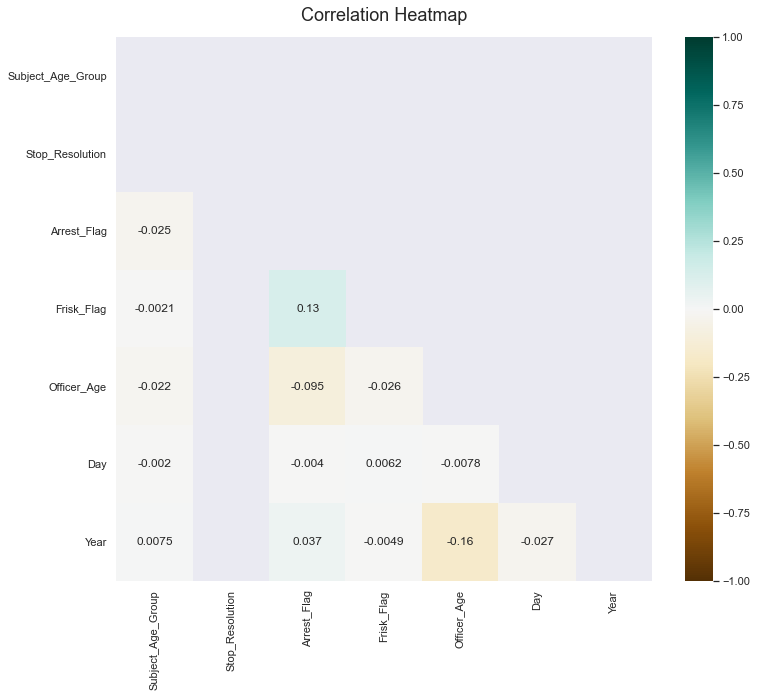

In [23]:
# function to plot correlation
def corre_plot(df):
    # mask    
    np.triu(np.ones_like(df.corr()))

    #visualize array
    plt.figure(figsize=(12, 10))
    # define the mask to set the values in the upper triangle to True
    mask = np.triu(np.ones_like(df.corr(), dtype=bool))
    heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

    # show plot
    plt.show()
    
# call function
corre_plot(df)

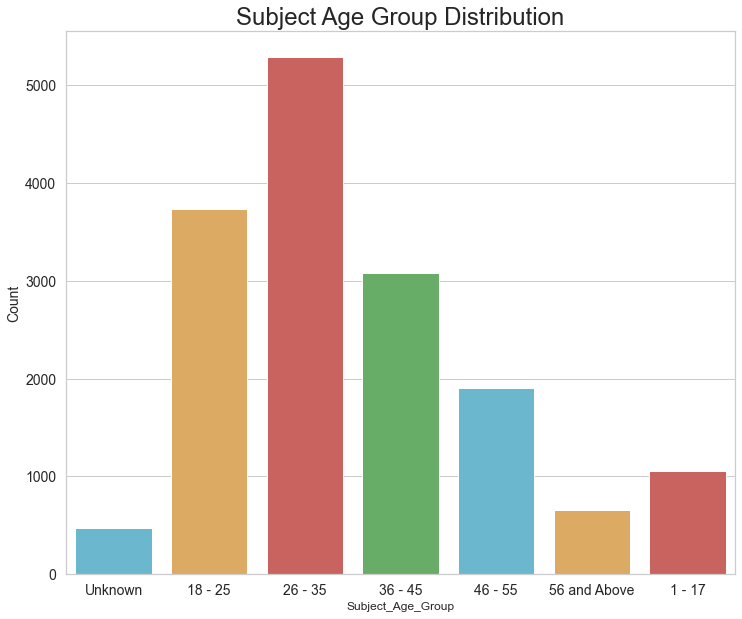

In [24]:
# set graph book
sns.set_style('whitegrid')
plt.subplots(figsize=(12 ,10))

custom_palette = ['#5bc0de', '#f0ad4e', '#d9534f', '#5cb85c']
sns.countplot(x='Subject_Age_Group', data=df, palette=custom_palette)

# set labels
plt.title('Subject Age Group Distribution',fontsize=24)
plt.xticks(range(7), ["Unknown", '18 - 25', '26 - 35', '36 - 45', '46 - 55', '56 and Above', '1 - 17', ], fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.tick_params(axis='both',labelsize=14)

# show figure
plt.show()

26 to 35 year olds are stopped more than any other age group.

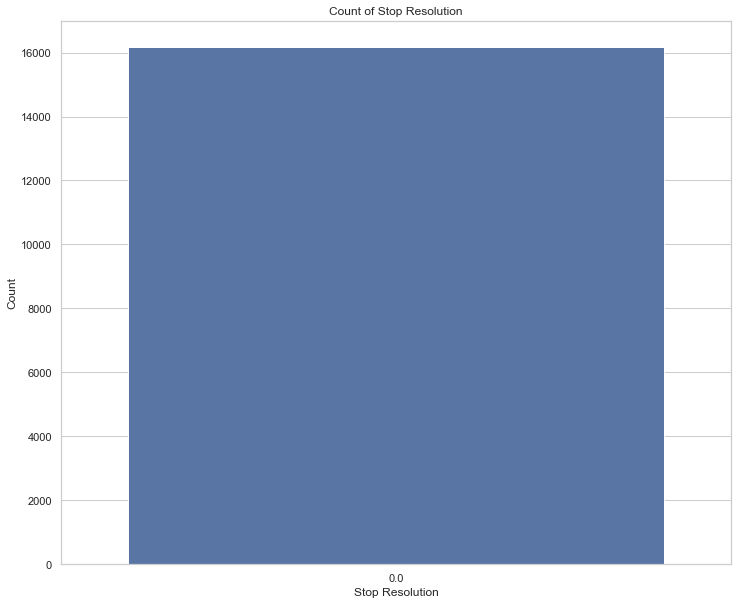

In [25]:
# create a bar plot of Stop Resolution count
sns.set(rc={'figure.figsize':(12,10)})
sns.set_style("whitegrid")
sns.countplot(x='Stop_Resolution', data=df)

# add title and labels
plt.title("Count of Stop Resolution")
plt.xlabel("Stop Resolution")
plt.ylabel("Count")

# Show plot
plt.show()

In [26]:
# Convert "Subject Age Group" column to numeric
df['Subject_Age_Group'] = pd.to_numeric(df['Subject_Age_Group'], errors='coerce')

# Create pivot table
pivot_table = df.pivot_table(index="Month", columns="Stop_Resolution", values="Subject_Age_Group", aggfunc="sum")

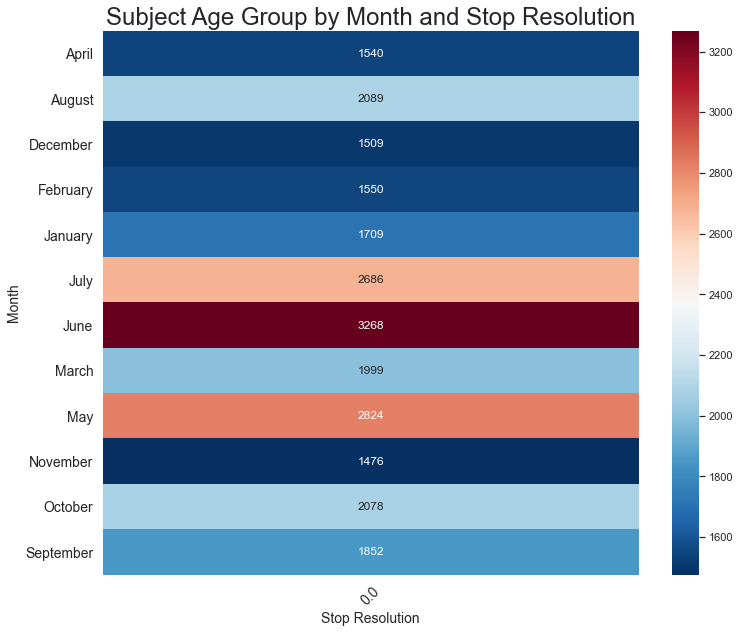

In [27]:
# create pivot table
pivot_table = df.pivot_table(index="Month",
                              columns="Stop_Resolution",
                              values="Subject_Age_Group",
                              aggfunc="sum")

# plot pivot table
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(pivot_table, cmap="RdBu_r", annot=True, fmt='0.0f')

# set labels
plt.title('Subject Age Group by Month and Stop Resolution', fontsize=24)
plt.xlabel('Stop Resolution', fontsize=14)
plt.ylabel('Month', fontsize=14)

plt.tick_params(axis='both', labelsize=14)

# rotate x-axis labels
plt.xticks(rotation=45)

# show figure
plt.show()

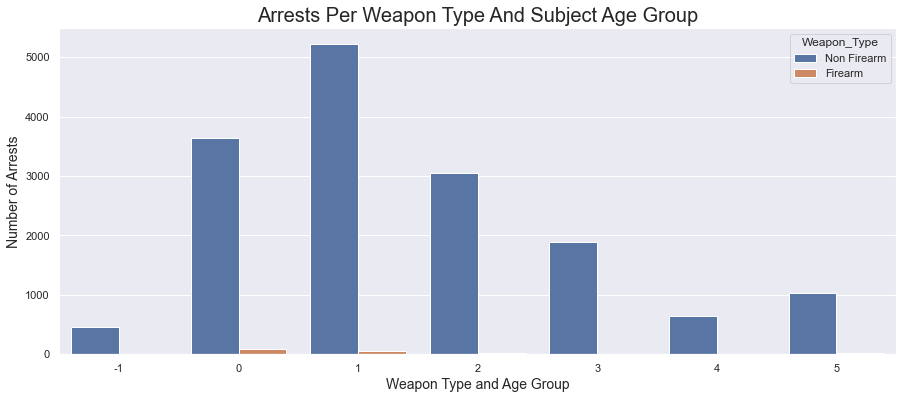

In [28]:
# use only data where an arrest was made and count how many of each weapon type for each age range exists:
plt.figure(figsize=(15,6))
arrested = df[df['Stop_Resolution']==1]
sns.countplot(data=df,x='Subject_Age_Group',hue='Weapon_Type')

# add chart title, and labels:
plt.title('Arrests Per Weapon Type And Subject Age Group', fontsize=20)
plt.xlabel('Weapon Type and Age Group', fontsize=14)
plt.ylabel('Number of Arrests', fontsize=14)

plt.show()

Most of the weapons found on motorists were non-firearms.

This document is available for further analysis.